# NLP_L3_워드임베딩_OSM
DATE : 21.04.14

##   목차

1. 벡터화
2. 워드임베딩 
- word2vec : 분포가설, cbow, skip-gram,negative sampling,oov문제
3. 임베딩 벡터 시각화
4. fast text
5. glove

# 1. Vectorization
기계는 텍스트보다 숫자를 더 잘 처리한다.
때문에 기계가 자연어를 더 잘 처리할 수 있도록 텍스트를 벡터(숫자)로 바꾸는 과정을 거친다. 

### 어떤 방법이 있을까?

**1) Bag of words** 

= 단어의 순서를 고려하지 않고 단어의 빈도만 고려해서 단어를 벡터화한다. 
i love you! -> (0 1 1)
do you love me? ->(0 1 1 0)
= 수치로 빈도수를 표현해서 두문장의 유사도를 구할 수 있다.

*유사도: 각 인덱스의 값을 곱한 후 더한다. 
* 0*0+1*1+1*1+0 = 유사도 2

한계점:
단어가 많을 경우 벡터의 차원이 많아진다->모델의 메모리 소비와 연산량이 많아진다.

많이 출현할수록 영향을 많이 미치는데 문맥이 안맞을 수 있다. 
처음보는 단어(오타, 줄임말)은 처리를 못한다. 

**DTM(Document-Term Matrix)**

Bag of words를 사용해서 문서 간 유사도를 비교하기 위한 행렬을 만든것 - 문서단어행렬(DTM)

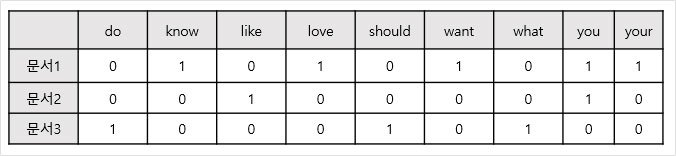

* 벡터의 값이 대부분 0이면 희소벡터라고 한다. 
* BAG OF WORDS는 문서와 단어수가 많아질수록 행렬에서 대부분 값이 0이 되어 희소문제가 발생한다.
* 중복을 제거한 단어의 집합을 단어장이라고 한다. 

**2)TF-IDF**

= 단어가 문서에 대한 정보를 얼마나 갖고 있는지 수치로 표현한것

TF(Term Frequency): 문서가 주어지면 단어가 몇번 출현했는지 알려주는 값(단어가 많이 출현하면 중요한 단어라고 판단)

단점: 의미없는 단어의 출현도가 높을때 중요하지 않은데 중요하다고 판단할 수도 있다.

a apple is in a apple box ->a랑 apple 둘다 2번 출현함 하지만 a(the, an) 같은 정관사는 중요한 단어가 아님 

이를 보완하기 위해 idf를 알아야한다. 

**IDF**
로그안에서 총 단어의 갯수를 문장에 출현한 단어의 갯수로 나눈다. 

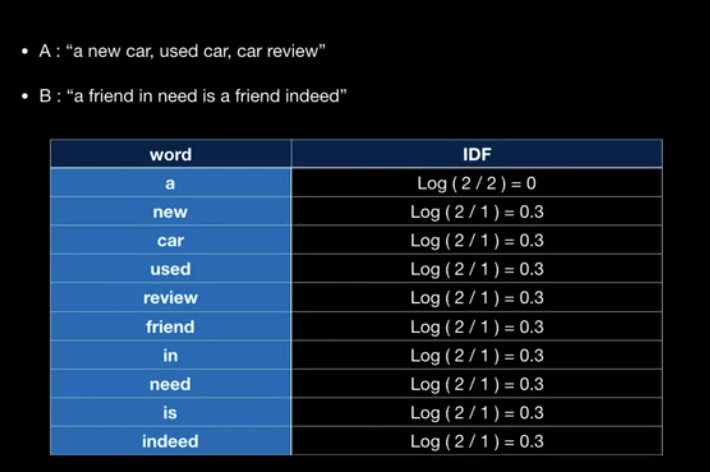

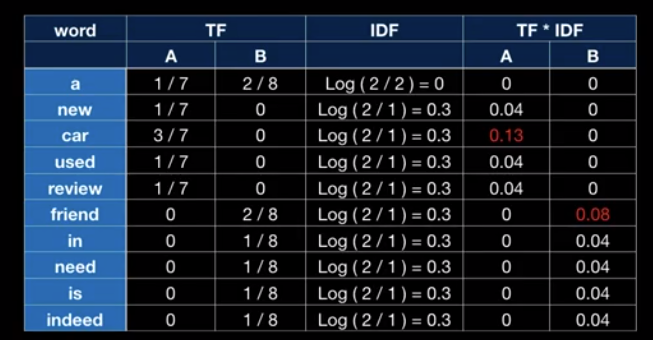

**3)원-핫 인코딩(one-hot encoding)**
= 모든 단어의 관계를 독립적으로 정의한다?

*방식
1. 텍스트 데이터에서 단어장을 만든다. 
2. 정수 인코딩: 단어장에 있는 단어에 고유한 숫자를 준다.(빈도수 상->하 순으로!,인덱스역할을 한다.)
- 각 단어는 벡터로 표현되며 해당 단어의 인덱스 위치면 1이고 나머지는 전부 0을 가진 벡터다. 

* 예시

문서1: 안녕, 나는 고양이
문서2: 고양이 안녕 반가워

= 단어장 크기는 4
안녕 :1번
고양이:2번
나는 :3번
반가워:4번

* 벡터로 표현

안녕:[1,0,0,0]
고양이:[0,1,0,0]
나는:[0,0,1,0]
반가워:[0,0,0,1]

🙅‍ 한계
단어가 늘어날수록 벡터를 저장하기 위한 공간(차원)도 늘어난다.
단어의 유사도를 표현하지 못한다. 

🙆🏻 해결책
1. 카운트 기반의 LSA, HAL
2. 예측기반 NNLM, RNNLM, WORD2VEC,FASTTEXT
3. 카운트+예측기반 : GLOVE

## 1-2) 벡터화 실습: 원-핫 인코딩 구현하기

In [8]:
import re
from konlpy.tag import Okt
from collections import Counter
print("임포트 완료")

임포트 완료


In [9]:
text = "임금님 귀는 당나귀 귀! 임금님 귀는 당나귀 귀! 실컷~ 소리치고 나니 속이 확 뚫려 살 것 같았어."
text

'임금님 귀는 당나귀 귀! 임금님 귀는 당나귀 귀! 실컷~ 소리치고 나니 속이 확 뚫려 살 것 같았어.'

## Step 2. 전처리 이야기

In [10]:
reg = re.compile("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]")
text = reg.sub('', text)
print(text)

임금님 귀는 당나귀 귀 임금님 귀는 당나귀 귀 실컷 소리치고 나니 속이 확 뚫려 살 것 같았어


## Step 3. 토큰화 이야기

In [15]:
# okt=Okt()
# tokens = okt.morphs(text)
# print(tokens)

## Step 4. 단어장 만들기

In [17]:
# vocab = Counter(tokens)
# print(vocab)

In [ ]:
vocab['임금님']

In [ ]:
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
print(vocab)

In [ ]:
# 높은 빈도수 단어에 정수 인덱스부여
word2idx={word[0] : index+1 for index, word in enumerate(vocab)}
print(word2idx) #단어장

## Step 5: 원-핫 벡터 만들기

In [18]:
def one_hot_encoding(word,word2index):
    one_hot_vector = [0]*len(word2index)
    print(one_hot_vector) #단어장 개수=5를 원핫벡터로 만들려고 0으로 길이만큼 만든다.
    index = word2index[word] #해당 단어의 위치를 확인한다. 2!
    print(index)
    one_hot_vector[index-1]=1 #인덱스는 0부터 시작하니깐 인덱스 -1자리에 해당 단어의 위치를 표시하는 1을 넣어준다.
    print(one_hot_vector)
    return one_hot_vector

print("슝")

슝


one_hot_encoding("임금님",word2idx)

* [0, 0, 0, 0, 0]
* 2
* [0, 1, 0, 0, 0]
* [0, 1, 0, 0, 0]

one_hot_encoding("실컷",word2idx)

* [0, 0, 0, 0, 0]
* 5
* [0, 0, 0, 0, 1]
* [0, 0, 0, 0, 1]

## 케라스를 통한 원-핫 인코딩(one-hot encoding)

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
print("임포트 완료")

임포트 완료


In [20]:
text = [['강아지', '고양이', '강아지'],['애교', '고양이'], ['컴퓨터', '노트북']]
text

[['강아지', '고양이', '강아지'], ['애교', '고양이'], ['컴퓨터', '노트북']]

케라스 토크나이저는 텍스트를 단어장으로 만들고 각 단어에 고유한 정수(인덱스)를 맵핑해준다. 

In [22]:
t = Tokenizer()
t.fit_on_texts(text)
print(t.word_index) # 각 단어에 대한 인코딩 결과 출력.

{'강아지': 1, '고양이': 2, '애교': 3, '컴퓨터': 4, '노트북': 5}


In [24]:
vocab_size = len(t.word_index) + 1
print(vocab_size)

6


A: +1을 하는 이유는?
Q: 케라스 토크나이저는 인덱스를 1부터 주지만 자연어처리할때 보통 0부터 인덱스를 주고 0번은 패딩을 위한 패딩토큰으로 사용된다. 그래서 1을 더한다.

In [26]:
sub_text = ['강아지', '고양이', '강아지', '컴퓨터']
encoded = t.texts_to_sequences([sub_text]) #텍스트를 정수 시퀀스(숫자문장으로!)
print(encoded)

[[1, 2, 1, 4]]


to_categorical()을 사용해서 원-핫 벡터의 시퀀스로 변환

In [30]:
one_hot = to_categorical(encoded,num_classes = vocab_size)
print(one_hot)

[[[0. 1. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0.]]]


# 5-3. 워드 임베딩

### 원-핫벡터의 문제점

1. 희소 벡터의 문제점

DTM, TF-IDF, 원-핫 벡터는 단어장의 크기에 영향을 받는 희소 벡터라는 특징을 갖고 있다. 
희소 벡터들은 차원의 저주(curse of dimensionality)라는 문제가 있다. 

차원의 저주란 차원이 커져도 성능이 올라가지 않는 다는 점이다. 

2. 원-핫 벡터의 문제점 : 단어의 의미적 유사성을 반영하지 못한다. 
사과-바나나/ 사과-핸드폰

사과 바나나가 유사성이 더 높지만 반영못한다. 

벡터간 유사도를 구하는 방법은 내적이 있다. 

원-핫벡터간의 내적은 서로 직교해서 값이 0이다. 
즉, 벡터간의 유사도가 0임을 의미한다. 벡터간의 유사도를 구할 수 없다!

🙆🏻 해결책
## 워드 임베딩 

& 밀집벡터
= 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞춘다. 또한 0,1을 가진 값이 아니라 실수값을 갖는다. 
ex) 사용자가 벡터의 차원을 128로 설정하면 모든 값이 실수가 된다. 

고양이 = [0.2 1.8 1.1 -2.1 1.1 2.8 ... 중략 ...] # 이 벡터의 차원은 128 

**워드임베딩**
= 밀집벡터 형태로 표현하는 것을 워드임베딩이라고 하며 그 결과를 임베딩 벡터라고 한다. 

임베딩 벡터의 값은 훈련데이터가 모델을 학습하는 과정에서 자동으로 얻어진다. 

특징
* 저차원이다. 
* 단어의 유사도를 갖는다. 

**임베딩 방법**
* LSA
* WORD2VEC
* FASTTEXT
* GLOVE

# Word2Vec 

## 핵심 아이디어 : 분포 가설
분포가설
= 비슷한 문맥에서 같이 등장하는 경향이 있는 단어는 비슷한 의미를 가진다. 

## 방법

1)  CBoW : 주변에 있는 단어로 중간에 있는 단어 예측

2) Skip-gram : 중간 단어로 주변 단어 예측

## 1) CBoW

* 예문: "I don't know what happend"

 가운데 know를 예측하는 것이 cbow가 하는 일이다. 이때 know가 중심단어고 예측에 사용되는 단어가 주변 단어(context word)다.
 
중심단어를 예측하려고 앞, 뒤로 몇개의 단어를 볼지 결정한 범위가 "윈도우"다

위도우가 1이면 앞뒤로 한 단어씩을 참고한다. 위도우 크기가 m일때 중심단어의 개수는 2m 개다.
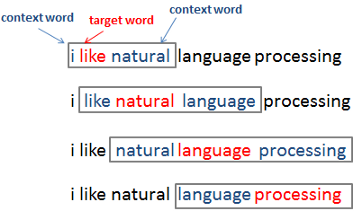


슬라이딩 윈도우: 윈도우를 정하면 주변단어랑 중심 단어를 바꿔하면서 학습 데이터 셋을 만드는 작업

슬라이딩 윈도우를 하면 데이터셋 형식은 ((주변단어의 셋), 중심단어)가 된다. 

이 데이터셋에서 단어는 원-핫 인코딩이 되어 원-핫 벡터(숫자)가 되고 이 벡터가 cbow,skip-gram의 입력이 된다. 

* CBoW 시각화

CBoW는 입력층, 은닉층, 출력층 3개의 층으로 구성된 인공신경망이다. 

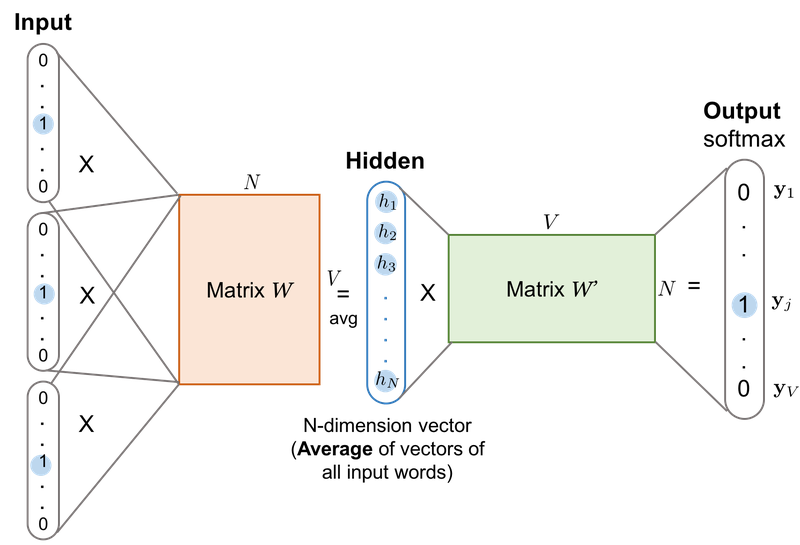

주황색은 첫번째 가중치 행렬

주변단어의 원-핫 벡터가 입력층에 있다. 

초록색은 두번째 가중치 행렬
중심단어의 원-핫 벡터가 출력층에 있다. 

입력층과 출력층의 크기는 단어집합의 크기인 V 로 고정되있다. 
은닉층의 크기는 N이라고 하고 하이퍼파라미터다.

* 입력층-> 은닉층

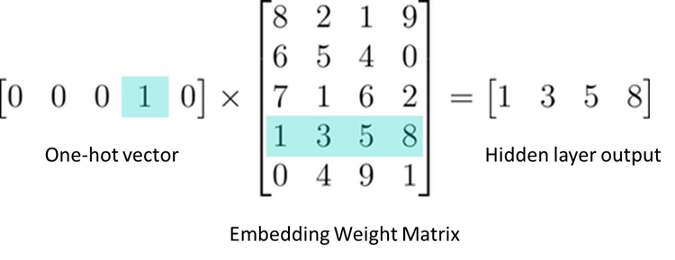

주변 단어의 원-핫 벡터가 첫번째 가중치 행렬과 곱해진다. 이때 원핫벡터는 1값만 가지니깐 사실상 가중치 행렬의 I 위치에 있는 행을 그대로 가져오는 거다.

이를 테이블에서 값을 그대로 룩업했다고 해서 "룩업 테이블"이라고 한다. 

그림은 단어장 크기가 5 은닉층 크기가 4다. 

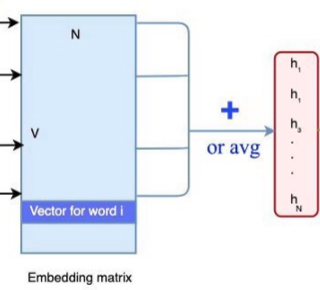

룩업 테이블을 거치면 2M개의 주변 단어 벡터는 각 N의 크기를 가진다. 
이 벡터를 모두 더하거나 평균을 구한것이 은닉층 값이다. 

은닉층은 활성화 함수가 없고 그냥 가중치 행렬과 곱셉만 하기 때문에 "투사층"이라고 한다.

* 은닉층-> 출력층

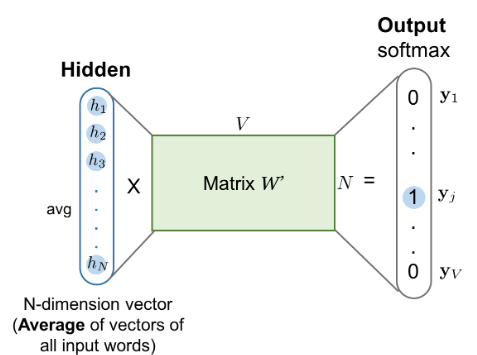

은닉층에 있는 N차원의 벡터는 두번째 가중치랑 곱해진다. 결과값은 V차원을 가진다. 

CBoW 는 출력층의 벡터와 중심단어의 원-핫 벡터의 손실을 구하고 이를 최소화하도록 학습한다. 이때 첫번째 가중치행렬과 두번째 가중치 행렬이 업데이트 되는다. 학습 후, N차원의 크기를 같는 W의 행이나 W2의 열 중 어떤것을 임베딩 벡터로 쓸지 결정한다. 

## 2) Skip-gram

= 중심단어로 부터 주변 단어를 예측한다. 

형식: (중심단어, 주변단어)

## 3) 네거티브 샘플링(negative sampling)

소프트맥스 함수를 사용한 V개 중 1개를 는 다중 클래스 분류 분제를 시그모이드 함수를 사용한 2진 분류 문제로 바뀐다. 

즉, 중심 단어와 주변 단어를 입력값으로 받아 이 두 단어가 정말로 이웃 관계면(실제로 중심 단어와 주변 단어의 관계면) 1을 아니면 0을 출력하는 문제로 바꾸는 것

## 5-7. Word2Vec (4) 영어 Word2Vec 실습과 OOV 문제

In [31]:
import nltk
nltk.download('abc')
nltk.download('punkt')

[nltk_data] Downloading package abc to /home/aiffel-dj54/nltk_data...
[nltk_data]   Package abc is already up-to-date!
[nltk_data] Downloading package punkt to /home/aiffel-
[nltk_data]     dj54/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
from nltk.corpus import abc
corpus = abc.sents()

In [33]:
print(corpus[:3])

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.']]


In [34]:
print('코퍼스의 크기 :',len(corpus))

코퍼스의 크기 : 29059


In [42]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = corpus,window=5,workers=4,sg=0)

In [43]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.9233381748199463), ('skull', 0.9110236167907715), ('Bang', 0.9056649208068848), ('asteroid', 0.9051844477653503), ('third', 0.9020044803619385), ('baby', 0.899389386177063), ('dog', 0.8985862135887146), ('bought', 0.8974976539611816), ('rally', 0.8912140727043152), ('disc', 0.8888920545578003)]


In [48]:
# from gensim.models import KeyedVectors

# model.wv.save_word2vec_format('~/aiffel/word_embedding/w2v') 
# loaded_model = KeyedVectors.load_word2vec_format("~/aiffel/word_embedding/w2v")
# print("모델  load 완료!")

In [ ]:
model_result = loaded_model.wv.most_similar("man")
print(model_result)

# 5-8. 임베딩 벡터의 시각화
https://projector.tensorflow.org/

# 5-9. FastText

Word2Vec을 그대로 따르고 있지만, 문자 단위 n-gram(character-level n-gram) 표현을 학습한다는 점에서 다르다. 

fasttext는 단어 내부의 내부 단어들을 학습한다. 

단어 partial n = 3

<pa, art, rti, tia, ial, al>, <partial>
    
* 특징
    
Word2Vec과 달리 OOV와 오타에 강건하다
즉, 단어장에 없는 단어라도, 해당 단어의 n-gram이 다른 단어에 존재한다면 이로부터 벡터값을 얻는다.
 

# 5-10. GloVe

= 카운트 기반과 예측기반을 모두 사용한 방법론 

* 카운트 기반이란?

LSA - DTM을 차원 축소하여 밀집표현으로 임베딩하는 방법
DTM에 특잇값 분해를 사용해서 잠재된 의미를 이끌어내는 방법이다. 

한계: (1) 차원 축소의 특성으로 인해 새로운 단어가 추가되면 다시 DTM을 만들어 새로 다시 차원 축소를 해야 한다는 점과 (2) 단어 벡터간 유사도를 계산하는 측면에서 Word2Vec보다 성능이 떨어진다는 점이었죠.

* 예측기반이란? 

Word2Vec-인공 신경망이 예측한 값으로부터 실제 레이블과의 오차를 구하고, 손실 함수를 통해서 인공 신경망을 학습하는 방식이었죠

* 윈도우 기반 동시 등장 행렬(Window based Co-occurrence Matrix)
=행과 열을 전체 단어장(vocabulary)의 단어들로 구성하고, 어떤 i 단어의 윈도우 크기(window Size) 내에서 k 단어가 등장한 횟수를 i행 k열에 기재한 행렬

* 동시 등장 확률
. 동시 등장 확률 P(k|i)는 동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률입니다. 이때 i를 중심 단어(center word), k를 주변 단어(context word)라고 합니다.


**GloVe**

GloVe는 동시 등장 행렬로부터 계산된 동시 등장 확률을 이용해 손실 함수를 설계합니다